Pyber

Observations:
(1) Larger cities (those classified as urban) have a higher number of drivers as well as a higher number of rides and a larger sum of total fares.
(2) Suburban and rural cities have 22% of the drivers, but account for 39% of the total fares.  Urban cities have 78% of the drivers accounting for 67.5% of the total fares.  This suggests that there is stronger competition for each driver in an urban city, but there is also nearly double the market for the service.
(3) Larger cities collect less per ride than smaller cities.  Rural cities collect the largest fares per ride.

In [1]:
#Import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from IPython.display import Image

In [2]:
#Read csv
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

pyber_df = ride_df.merge(city_df, on="city")

In [3]:
#Drop duplicate in city_df for future use.  This already happened in pyber_df during merge.
unique_city_df= city_df.drop_duplicates(["city"])

In [4]:
#Get totals for future calculations

all_drivers = sum(unique_city_df["driver_count"])
all_fares = round(sum(ride_df["fare"]))
all_rides = pyber_df["ride_id"].count()

Urban Statistics

In [5]:
#Split and group dataframes to calculate totals for urban cities
urban_df = pyber_df[pyber_df["type"]=="Urban"]
unique_urban_df = unique_city_df[unique_city_df["type"]=="Urban"]

urban_fares_df = urban_df[["city","fare"]]
urban_fares_df = urban_fares_df.groupby(["city"]).mean()
urban_average_fares = []
for x in range(len(urban_fares_df)):
    urban_fare = urban_fares_df.iloc[x]["fare"]
    urban_average_fares.append(urban_fare)

urban_rides_df = urban_df[["city","ride_id"]]
urban_rides_df = urban_rides_df.groupby(["city"]).count()
urban_rides = []
for x in range(len(urban_rides_df)):
    urban_ride = urban_rides_df.iloc[x]["ride_id"]
    urban_rides.append(urban_ride)

urban_drivers = []
for x in range(len(unique_urban_df)):
    urban_driver = unique_urban_df.iloc[x]["driver_count"]
    urban_drivers.append(urban_driver)

urban_total_fares = round(sum(urban_df["fare"]))
urban_total_drivers = sum(urban_drivers)
urban_total_rides = sum (urban_rides)
utf_percent = (urban_total_fares / all_fares)*100
utd_percent = (urban_total_drivers/all_drivers)*100
utr_percent = (urban_total_rides/all_rides)*100

Suburban Statistics

In [6]:
#Split and group dataframes to calculate totals for suburban cities
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]
unique_suburban_df = unique_city_df[unique_city_df["type"]=="Suburban"]

sub_fares_df = suburban_df[["city","fare"]]
sub_fares_df = sub_fares_df.groupby(["city"]).mean()

sub_average_fares = []
for x in range(len(sub_fares_df)):
    sub_fare = sub_fares_df.iloc[x]["fare"]
    sub_average_fares.append(sub_fare)

sub_rides_df = suburban_df[["city","ride_id"]]
sub_rides_df = sub_rides_df.groupby(["city"]).count()
sub_rides = []
for x in range(len(sub_rides_df)):
    sub_ride = sub_rides_df.iloc[x]["ride_id"]
    sub_rides.append(sub_ride)

sub_drivers = []
for x in range(len(unique_suburban_df)):
    sub_driver = unique_suburban_df.iloc[x]["driver_count"]
    sub_drivers.append(sub_driver)
    
sub_total_fares = round(sum(suburban_df["fare"]))
sub_total_drivers = sum(sub_drivers)
sub_total_rides = sum (sub_rides)
stf_percent = (sub_total_fares / all_fares)*100
std_percent = (sub_total_drivers/all_drivers)*100
str_percent = (sub_total_rides/all_rides)*100

Rural Statistics

In [7]:
#Split and group dataframes to calculate totals for rural cities
rural_df = pyber_df[pyber_df["type"]=="Rural"]
unique_rural_df = unique_city_df[unique_city_df["type"]=="Rural"]

rural_fares_df = rural_df[["city","fare"]]
rural_fares_df = rural_fares_df.groupby(["city"]).mean()

rural_average_fares = []
for x in range(len(rural_fares_df)):
    rural_fare = rural_fares_df.iloc[x]["fare"]
    rural_average_fares.append(rural_fare)

rural_rides_df = rural_df[["city","ride_id"]]
rural_rides_df = rural_rides_df.groupby(["city"]).count()

rural_rides = []
for x in range(len(rural_rides_df)):
    rural_ride = rural_rides_df.iloc[x]["ride_id"]
    rural_rides.append(rural_ride)

rural_drivers = []
for x in range(len(unique_rural_df)):
    rural_driver = unique_rural_df.iloc[x]["driver_count"]
    rural_drivers.append(rural_driver)

rural_cities = []
for x in range(len(unique_rural_df)):
    rural_city= unique_rural_df.iloc[x]["city"]
    rural_cities.append(rural_city)

rural_total_fares = round(sum(rural_df["fare"]))
rural_total_drivers = sum(rural_drivers)
rural_total_rides = sum (rural_rides)
rtf_percent = (rural_total_fares / all_fares)*100
rtd_percent = (rural_total_drivers/all_drivers)*100
rtr_percent = (rural_total_rides/all_rides)*100

Plot Pyber Ride Sharing Data

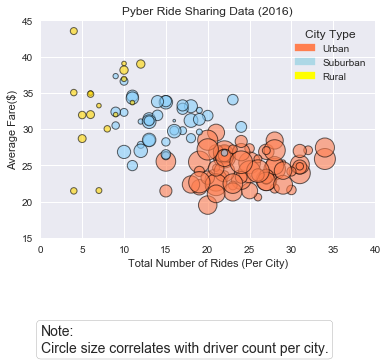

In [8]:
# Urban plot data
urban_x = urban_rides_df["ride_id"]
urban_y = urban_fares_df["fare"]
urban_z = unique_urban_df["driver_count"]

#Suburban data
sub_x = sub_rides_df["ride_id"]
sub_y = sub_fares_df["fare"]
sub_z = unique_suburban_df["driver_count"]

#Rural data
rural_x = rural_rides_df["ride_id"]
rural_y = rural_fares_df["fare"]
rural_z = unique_rural_df["driver_count"]

#Set parameters and aesthtics
sns.set()
plt.xlim(0, 40)
plt.ylim(15, 45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
coral_patch = mpatches.Patch(color='coral', label='Urban')
blue_patch = mpatches.Patch(color='lightblue', label='Suburban')
yellow_patch = mpatches.Patch(color='yellow', label='Rural')
plt.legend(handles=[coral_patch,blue_patch,yellow_patch],loc="upper right",title="City Type")
textstr = ("Note:\nCircle size correlates with driver count per city.")
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.05, 0.95, textstr, fontsize=14,verticalalignment='center', bbox=props)


#Plot
plt.scatter(urban_x, urban_y, s=urban_z*7, c="coral",alpha=0.6, linewidth=1,edgecolors="black")
plt.scatter(sub_x, sub_y, s=sub_z*7, c="lightskyblue",alpha=0.6, linewidth=1,edgecolors="black")
plt.scatter(rural_x, rural_y, s=rural_z*7, c="gold",alpha=0.6, linewidth=1,edgecolors="black")
plt.show()

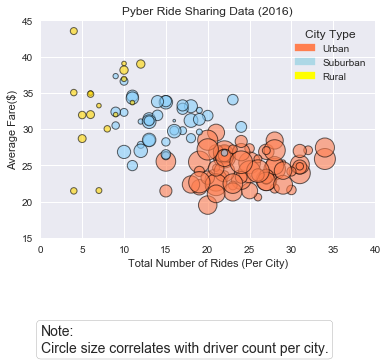

In [9]:
Image("/my_images/Pyber_ride_sharing_data.png")

Total Fares by City Type

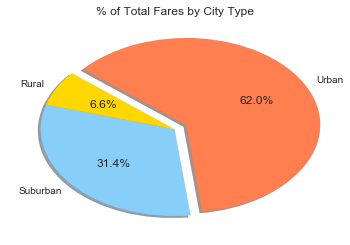

In [10]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [utf_percent,stf_percent,rtf_percent]
colors = ["coral", "lightskyblue", "gold"]
explode = (0.1, 0,0)
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, counterclock = False, startangle=140)
plt.show()

Total Rides by City Type

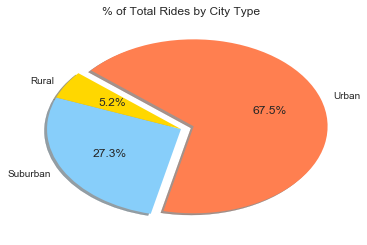

In [11]:
sizes = [utr_percent,str_percent,rtr_percent]
colors = ["coral", "lightskyblue", "gold"]
explode = (0.1, 0,0)
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, counterclock = False, startangle=140)
plt.show()

Total Driver by City Type

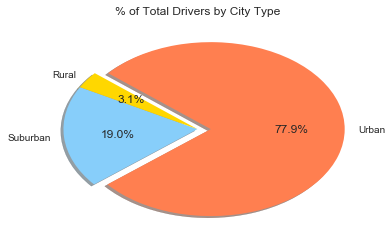

In [12]:
sizes = [utd_percent,std_percent,rtd_percent]
colors = ["coral", "lightskyblue", "gold"]
explode = (0.1, 0,0)
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, counterclock = False, startangle=140)
plt.show()